In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers
from keras.layers import Dense, Flatten, Input, Lambda
from tensorflow.keras.models import Sequential 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from glob import glob

In [2]:
img_height, img_width = 180,180

In [3]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 zoom_range=0.2,
                                 shear_range=0.1,
                                vertical_flip=False)
training_set=train_datagen.flow_from_directory('D:/Documents/Capstone/Project -2/New Bangladeshi/BangladeshiCrops/BangladeshiCrops/Train',
                                              target_size = (img_height,img_width),
                                              class_mode = 'categorical',
                                              batch_size=256)

Found 10554 images belonging to 14 classes.


In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255,
                                 zoom_range=0.2)

test_set=test_datagen.flow_from_directory('D:/Documents/Capstone/Project -2/New Bangladeshi/BangladeshiCrops/BangladeshiCrops/Test',
                                              target_size=(img_height,img_width),
                                              class_mode='categorical',
                                              batch_size=256)

Found 2470 images belonging to 14 classes.


In [5]:
resnet_model = Sequential()

pretrained_model = tf.keras.applications.ResNet50(include_top = False,
                                                 input_shape=(180,180,3),
                                                 pooling='avg', classes=2,
                                                 weights='imagenet')
for layer in pretrained_model.layers:
    layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Dense(14, activation='softmax'))

In [6]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 14)                28686     
                                                                 
Total params: 23,616,398
Trainable params: 28,686
Non-trainable params: 23,587,712
_________________________________________________________________


In [7]:
resnet_model.compile(optimizer=Adam(lr=0.01), loss='categorical_crossentropy',metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.TruePositives()])

C:\Users\karma\.conda\envs\FarmwiseAI\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [8]:
epochs=8
history = resnet_model.fit(training_set, validation_data=test_set, epochs=epochs)

Epoch 1/8
42/42 [==============================] - 581s 14s/step - loss: 2.6693 - accuracy: 0.1900 - auc: 0.6673 - precision: 0.7723 - recall: 0.0443 - true_positives: 468.0000 - val_loss: 2.0991 - val_accuracy: 0.2700 - val_auc: 0.8028 - val_precision: 0.8265 - val_recall: 0.0656 - val_true_positives: 162.0000
Epoch 2/8
42/42 [==============================] - 566s 13s/step - loss: 1.9447 - accuracy: 0.3848 - auc: 0.8421 - precision: 0.8177 - recall: 0.0795 - true_positives: 839.0000 - val_loss: 1.9605 - val_accuracy: 0.3032 - val_auc: 0.8338 - val_precision: 0.7344 - val_recall: 0.0761 - val_true_positives: 188.0000
Epoch 3/8
42/42 [==============================] - 564s 13s/step - loss: 1.7816 - accuracy: 0.4473 - auc: 0.8710 - precision: 0.8240 - recall: 0.1131 - true_positives: 1194.0000 - val_loss: 1.7967 - val_accuracy: 0.4551 - val_auc: 0.8702 - val_precision: 0.8104 - val_recall: 0.0883 - val_true_positives: 218.0000
Epoch 4/8
42/42 [==============================] - 565s 13s/

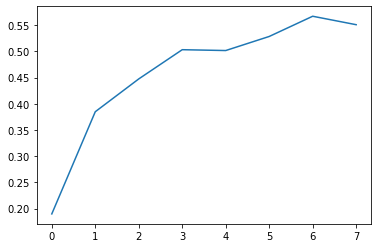

In [9]:
from matplotlib import pyplot
pyplot.plot(history.history['accuracy'])
pyplot.show()